# 单变量线性回归

吴明晖

浙江大学城市学院

2020.2

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用Tensorflow进行算法设计与训练的核心步骤" data-toc-modified-id="使用Tensorflow进行算法设计与训练的核心步骤-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用Tensorflow进行算法设计与训练的核心步骤</a></span></li><li><span><a href="#Tensorflow实现单变量线性回归" data-toc-modified-id="Tensorflow实现单变量线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow实现单变量线性回归</a></span><ul class="toc-item"><li><span><a href="#生成数据" data-toc-modified-id="生成数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>生成数据</a></span></li><li><span><a href="#构建模型" data-toc-modified-id="构建模型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>构建模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#进行预测" data-toc-modified-id="进行预测-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>进行预测</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 使用Tensorflow进行算法设计与训练的核心步骤

- ** （1）准备数据 **
- ** （2）构建模型 **
- ** （3）训练模型 **
- ** （4）进行预测 **

上述步骤是我们使用Tensorflow进行算法设计与训练的核心步骤，贯穿于后面介绍的具体实战中。<br> 本章用一个简单的例子来讲解这几个步骤。



# 有监督机器学习过程示意图

![机器学习过程示意图](机器学习过程示意图.png)

# Tensorflow实现单变量线性回归

假设我们要学习的函数为线性函数$ y=2x+1 $

## 生成数据

In [1]:
# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会在网页里显示图像
%matplotlib inline

import matplotlib.pyplot as plt # 载入matplotlib
import numpy as np # 载入numpy
import tensorflow as tf # 载入Tensorflow

# 设置随机数种子
np.random.seed(5)

** 首先，生成输入数据。 ** <br> 我们需要构造满足这个函数的$x$和$y$同时加入一些不满足方程的噪声.

In [2]:
# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间

x_data = np.linspace(-1, 1, 100) 

# y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致

y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4  

** 利用matplotlib画图 **

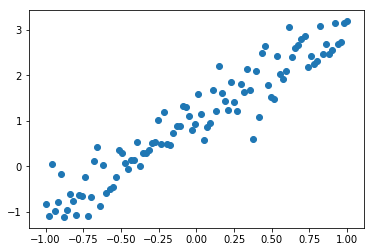

In [3]:
#画出随机生成数据的散点图

plt.scatter(x_data, y_data) 

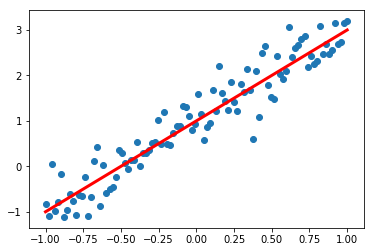

In [4]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 

# 画出我们想要通过学习得到的目标线性函数 y = 2x +1

plt.plot (x_data, 1.0 + 2 * x_data,  'r',linewidth=3) 

## 构建模型

** 构建回归模型 **

In [5]:
# x 就是数据点的横坐标、特征值，返回值是y 数据点的纵坐标、标签值

def model(x, w, b):
    return tf.multiply(x, w) + b 

** 创建变量 **
<br>
- Tensorflow变量的声明函数是tf.Variable
- tf.Variable的作用是保存和更新参数
- 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [6]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name="w")

# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name="b")   

## 训练模型

** 设置训练参数 **

In [13]:
# 迭代次数（训练轮数）
train_epochs = 100 

# 学习率
learning_rate = 0.05 

# 控制显示loss值的粒度
display_step = 10

** 关于学习率（learning_rate）的设置 **<br>
- 学习率的作用：控制参数更新的幅度。
- 如果学习率设置过大，可能导致参数在极值附近来回摇摆，无法保证收敛。
- 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

** 定义损失函数 **
<br>
- 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
- 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

In [8]:
# 采用均方差作为损失函数

def loss(x, y, w, b):
    err = model(x, w, b) - y #  how 'wrong' our predicted (learned)  y is
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err) # overall mean of squared error.

** 计算梯度 **

In [9]:
# Find the derivative of loss with respect to weight and bias
# 计算梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b]) # direction and value of the gradient of our loss w.r.t weight and bias

** 执行训练 **

Train Epoch: 01 loss=0.441349
Train Epoch: 02 loss=0.405025
Train Epoch: 03 loss=0.374186
Train Epoch: 04 loss=0.347884
Train Epoch: 05 loss=0.325347
Train Epoch: 06 loss=0.305940
Train Epoch: 07 loss=0.289147
Train Epoch: 08 loss=0.274543
Train Epoch: 09 loss=0.261778
Train Epoch: 10 loss=0.250566
Train Epoch: 11 loss=0.240670
Train Epoch: 12 loss=0.231894
Train Epoch: 13 loss=0.224077
Train Epoch: 14 loss=0.217084
Train Epoch: 15 loss=0.210801
Train Epoch: 16 loss=0.205137
Train Epoch: 17 loss=0.200010
Train Epoch: 18 loss=0.195357
Train Epoch: 19 loss=0.191119
Train Epoch: 20 loss=0.187250
Train Epoch: 21 loss=0.183708
Train Epoch: 22 loss=0.180459
Train Epoch: 23 loss=0.177472
Train Epoch: 24 loss=0.174721
Train Epoch: 25 loss=0.172184
Train Epoch: 26 loss=0.169841
Train Epoch: 27 loss=0.167674
Train Epoch: 28 loss=0.165667
Train Epoch: 29 loss=0.163808
Train Epoch: 30 loss=0.162083
Train Epoch: 31 loss=0.160481
Train Epoch: 32 loss=0.158994
Train Epoch: 33 loss=0.157611
Train Epoc

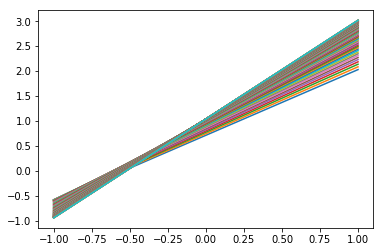

In [14]:
loss_list = []   # 用于保存loss值的列表

for epoch in range(train_epochs):
    loss_ = loss(x_data, y_data, w, b)
    loss_list.append(loss_)
        
    delta_w, delta_b = grad(x_data, y_data, w, b) # direction (sign)  and value of the gradient of our loss w.r.t weight and bias
    change_w = delta_w * learning_rate # adjustment amount for weight
    change_b = delta_b * learning_rate # adjustment amount for bias
    w.assign_sub(change_w) # subract change_W from W
    b.assign_sub(change_b) # subract change_B from B
               
     
    print("Train Epoch:", '%02d' % (epoch+1), "loss=%.6f" % (loss_))
    plt.plot (x_data, w.numpy() * x_data + b.numpy()  )# 画图_
        

从上图可以看出，由于本案例所拟合的模型较简单，训练3次之后已经接近收敛。<br> 对于复杂模型，需要更多次训练才能收敛。

** 打印结果 **

In [15]:
print ("w：", w.numpy()) # w的值应该在2附近 
print ("b：", b.numpy()) # b的值应该在1附近 

w： 1.9829319
b： 1.0366092


查看损失变化

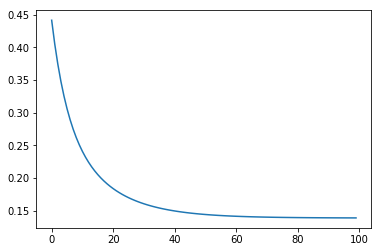

In [16]:
plt.plot(loss_list)

** 可视化 **

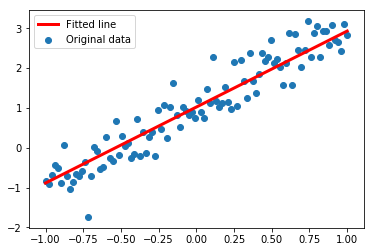

In [26]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot (x_data, x_data * w.numpy() + b.numpy(),\
          label='Fitted line',color='r', linewidth=3)
plt.legend(loc=2)# 通过参数loc指定图例位置

## 进行预测

In [27]:
x_test = 3.21

predict = model(x_test,w.numpy(),b.numpy())
print("预测值：%f" % predict)

target = 2 * x_test + 1.0
print("目标值：%f" % target)

预测值：7.142073
目标值：7.420000


** 以上是利用Tensorflow训练一个线性模型并进行预测的完整过程。<br> 通过逐渐降低损失值loss来训练参数$w$和$b$拟合 $y = 2x + 1$中的系数2和1。 ** 

# 小结

** 通过一个简单的例子介绍了利用Tensorflow实现机器学习的思路，重点讲解了下述步骤： ** <br>
** - （1）生成人工数据集及其可视化 ** <br>
** - （2）构建线性模型 **<br>
** - （3）定义损失函数 **<br>
** - （4）最小化损失函数 **<br>
** - （5）训练结果的可视化 **<br>
** - （6）利用学习到的模型进行预测 **

